#Objective

The objective of this analysis is to identify and understand the key factors that influence employee job satisfaction within the company. By leveraging available employee data, this study aims to:

1.   Analyze the relationship between job satisfaction and variables such as salary, tenure, department, and work flexibility.
2.   Apply statistical methods and data visualizations to uncover trends and patterns that may affect satisfaction levels.

3.   Segment employees based on their satisfaction levels to highlight groups with significantly higher or lower satisfaction than average.


The insights gained will help the HR team develop targeted strategies to improve employee satisfaction and retention, thereby supporting long-term business sustainability.

## Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

## Read Dataset

In [ ]:
df_employee = pd.read_csv('/content/assignment_employee_survey.csv')

#Display dataset
df_employee.head()

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.50,2,1,7.60,Car,20,3,12,0,Bachelor,True,33.50,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.80,2,2,7.90,Car,15,4,11,0,Bachelor,False,36.00,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.10,5,4,6.50,Motorbike,17,0,30,0,Bachelor,True,10.50,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.90,3,1,7.50,Public Transport,13,2,9,0,Bachelor,True,23.00,5
4,45,Female,33,Married,Mid,10,Operations,Part-Time,2,3,1.40,4,2,6.20,Car,8,3,13,0,Bachelor,False,35.00,5


### Description Each Column

| Column Name               | Description                               |
|--------------------------|-------------------------------------------|
| emp_id                   | Unique ID for each employee               |
| gender                   | Employee's gender                         |
| age                      | Employee's age                            |
| marital_status           | Marital status of the employee            |
| job_level                | Employee’s job level                      |
| experience               | Years of work experience                  |
| dept                     | Department where the employee works       |
| emp_type                 | Type of employment                        |
| wlb                      | Work-life balance rating (1 = poor, 5 = excellent) |
| work_env                 | Rating of the work environment            |
| physical_activity_hours  | Hours of physical activity per week       |
| workload                 | Workload level (higher = heavier workload)|
| stress                   | Reported stress level                     |
| sleep_hours              | Average hours of sleep per day            |
| commute_mode             | Mode of transportation to work            |
| commute_distance         | Commute distance from home to office (in km) |
| num_companies            | Number of companies worked at previously  |
| team_size                | Number of people in the employee's team   |
| num_reports              | Number of direct reports                  |
| edu_level                | Last education level (e.g., Bachelor, Master) |
| have_ot                  | Whether the employee often works overtime (True/False) |
| training_hours_per_year  | Total training hours per year             |
| job_satisfaction         | Job satisfaction score (1–5, higher means more satisfied) |


## Data Understanding

In [ ]:
#Checking information about Dataset
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

## Data Cleansing

### 1. Convert emp_id to string

In [ ]:
df_employee['emp_id'] = df_employee['emp_id'].astype(str)

### 2. Convert job satisfaction to label

In [ ]:
# Mapping label (from numeric to string)
label_dict = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

# Save new column
df_employee['job_satisfaction_label'] = df_employee['job_satisfaction'].map(label_dict)

### 3. Checking Duplicate

In [ ]:
len(df_employee.drop_duplicates()) / len(df_employee)

1.0

**Interpretation**:

Because the result is 1, then nothing duplicate data

### 4. Handling Missing Value

*   Checking null data



In [ ]:
df_employee.isna().sum()

,0
emp_id,0
gender,0
age,0
marital_status,0
job_level,0
experience,0
dept,0
emp_type,0
wlb,0
work_env,0


**Interpretation**:

There is no null data in each column


*   Checking with value counts



In [ ]:
for col in df_employee.columns:
    print(f"===={col}====")
    print(df_employee[col].value_counts())
    display()

====emp_id====
emp_id
2183    1
6       1
11      1
33      1
20      1
       ..
323     1
218     1
185     1
173     1
151     1
Name: count, Length: 2766, dtype: int64
====gender====
gender
Male      1526
Female    1240
Name: count, dtype: int64
====age====
age
23    151
24    145
22    143
36    111
28    104
31    104
37    104
29    101
25    101
26    100
30     99
32     97
40     97
34     95
33     94
35     92
27     90
39     85
38     82
53     58
48     56
54     54
50     54
47     50
51     47
52     47
45     46
49     43
44     43
43     41
41     40
46     40
42     35
59     26
58     22
57     20
56     19
60     19
55     11
Name: count, dtype: int64
====marital_status====
marital_status
Married     1397
Single      1180
Divorced     189
Name: count, dtype: int64
====job_level====
job_level
Senior            979
Mid               696
Junior            557
Lead              350
Intern/Fresher    184
Name: count, dtype: int64
====experience====
experience
2     235

**Interpretation**:

Based on checking one by one, there is no missing value

### 4. Outlier Handling

In [ ]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   object 
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

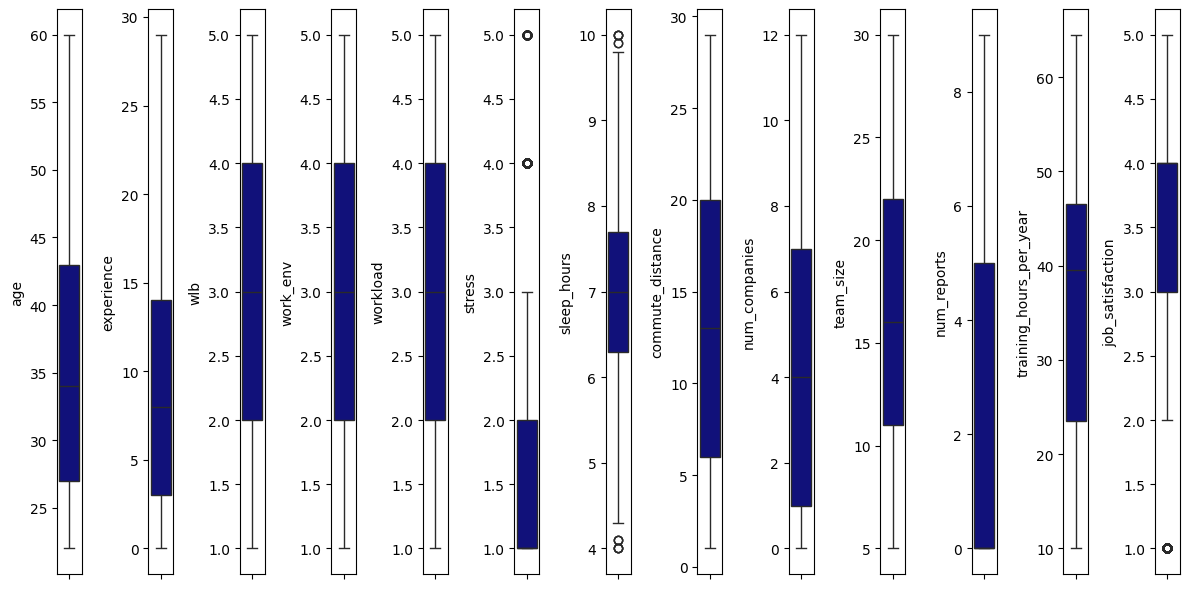

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = ['age','experience','wlb','work_env','workload','stress','sleep_hours','commute_distance',
            'num_companies','team_size','num_reports','training_hours_per_year', 'job_satisfaction']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_employee[features[i]], color='darkblue')
    plt.tight_layout()

**Interpretation:**

The outlier still make sense

## EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df_employee['job_satisfaction_label'].value_counts()

,count
job_satisfaction_label,
Satisfied,1127
Neutral,519
Very Satisfied,478
Very Dissatisfied,388
Dissatisfied,254


### 1. Job Satisfaction Distribution

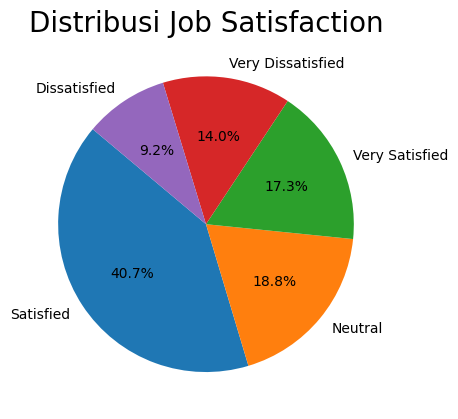

In [ ]:
#Checking Job satisfaction distribution
job_satisfaction_counts = df_employee['job_satisfaction_label'].value_counts()
plt.pie(job_satisfaction_counts, labels=job_satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Job Satisfaction", fontsize=20)
plt.show()

**Interpretasi**
More than a half, employee feel satisfied (Satisfied and Very ssatisfied)

### 2. Gender Distribution

In [ ]:
#Grouping gender
gd = df_employee.groupby(['gender']).agg({'emp_id': 'count'}).reset_index()
gd

,gender,emp_id
0,Female,1240
1,Male,1526


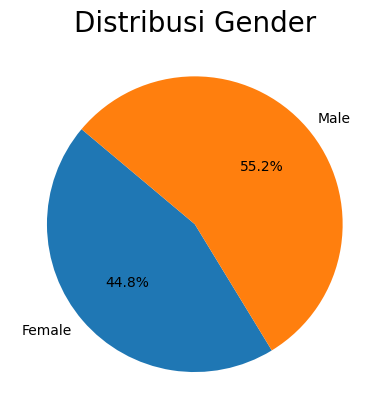

In [ ]:
#Visualizing gender distribution using pie
plt.pie(gd['emp_id'], labels=gd['gender'], autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Gender", fontsize=20)
plt.show()

**Interpretation**

more male employees than female employees

### 3. Marital Status Distribution

In [ ]:
#Grouping marital status
md = df_employee.groupby(['marital_status']).agg({'emp_id': 'count'}).reset_index()
md

,marital_status,emp_id
0,Divorced,189
1,Married,1397
2,Single,1180


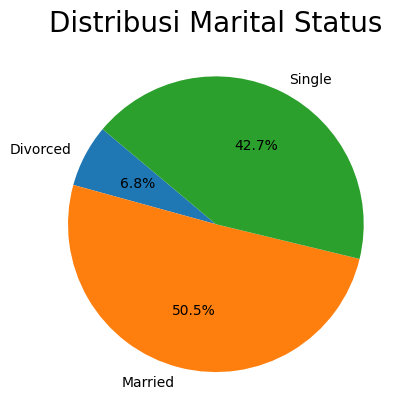

In [ ]:
#Visualizing marital status distribution using pie
plt.pie(md['emp_id'], labels=md['marital_status'], autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Marital Status", fontsize=20)
plt.show()

**Interpretation**
Most of employees are married

### 4. Job Level Distribution

In [ ]:
#Grouping job level
jl = df_employee.groupby(['job_level']).agg({'emp_id': 'count'}).reset_index()
jl

,job_level,emp_id
0,Intern/Fresher,184
1,Junior,557
2,Lead,350
3,Mid,696
4,Senior,979


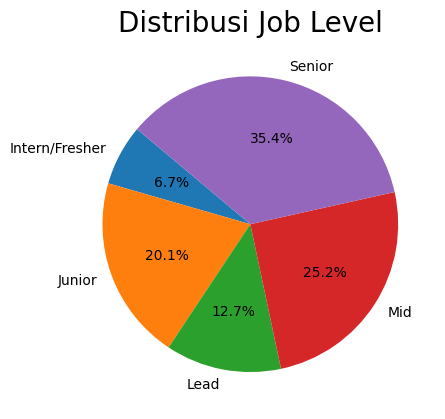

In [ ]:
#Visualizing job level distribution using pie
plt.pie(jl['emp_id'], labels=jl['job_level'], autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Job Level", fontsize=20)
plt.show()

### 5. Job Satisfaction vs Age

In [ ]:
# count the number of employee of each age and job_satisfaction category
js_1 = df_employee.groupby(['job_satisfaction_label', 'age']).agg({'emp_id': 'count'}).reset_index()

# unique categories of job_satisfaction
p_categories = js_1['job_satisfaction_label'].unique()

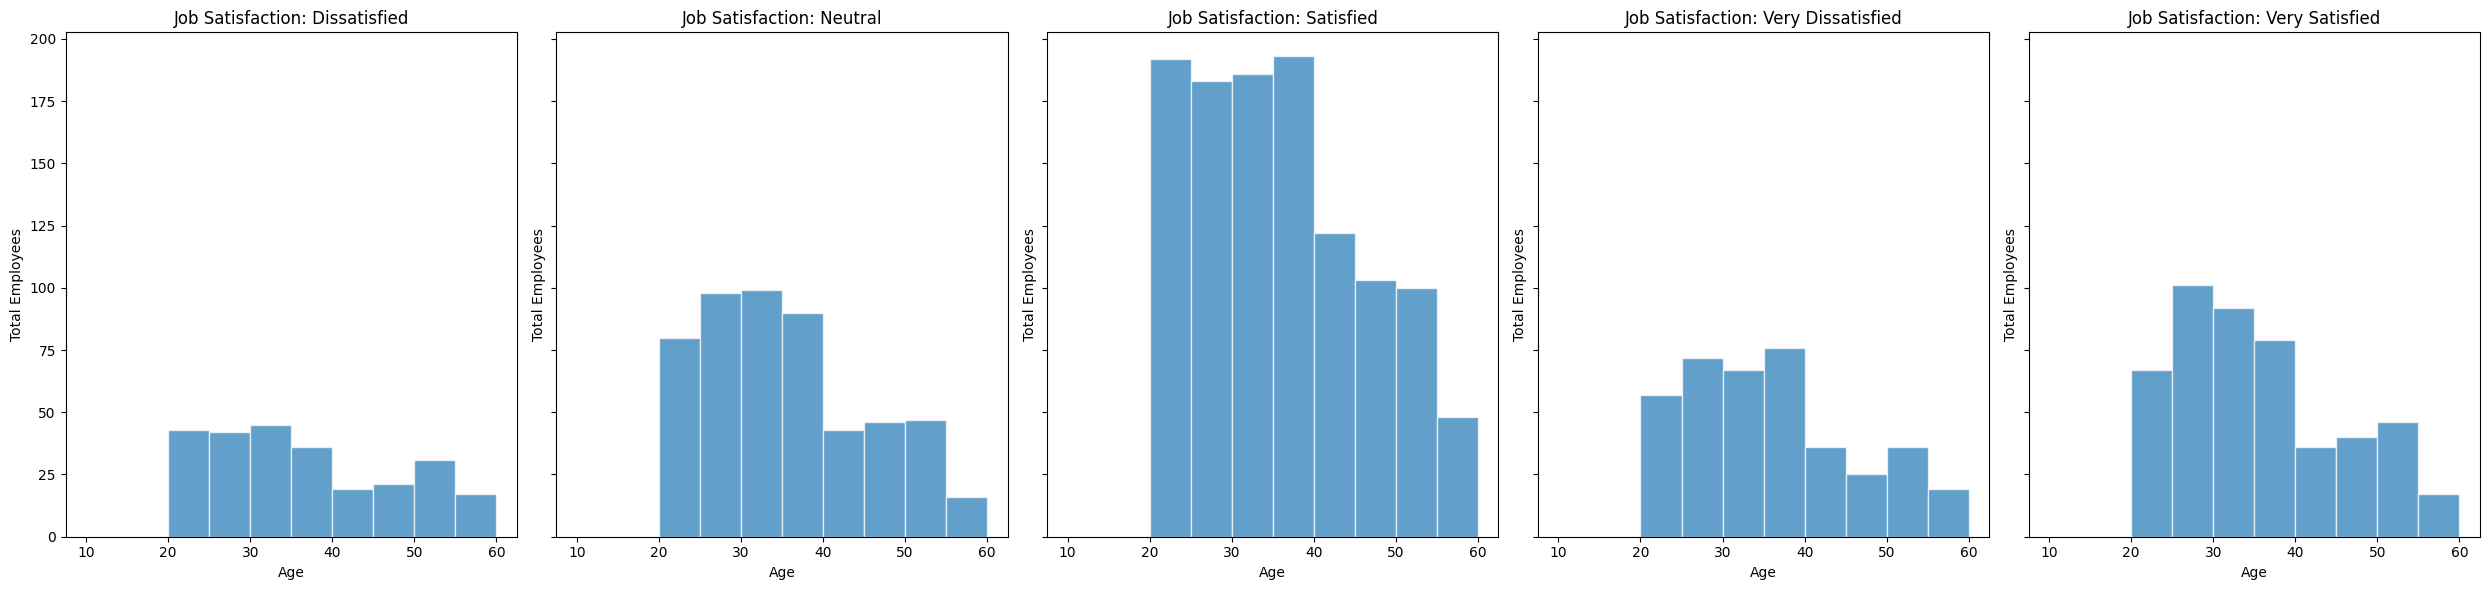

In [ ]:
df_clean = df_employee.dropna(subset=['job_satisfaction_label', 'age'])

if len(p_categories) > 0:
    fig, axes = plt.subplots(1, len(p_categories), figsize=(5*len(p_categories), 6), sharey=True)

    if len(p_categories) == 1:
        axes = [axes]  # bungkus jika hanya 1 subplot

    for i, category in enumerate(p_categories):
        subset = df_clean[df_clean['job_satisfaction_label'] == category]
        axes[i].hist(subset['age'], bins=range(10, 65, 5), edgecolor='white', alpha=0.7)
        axes[i].set_title(f'Job Satisfaction: {category}')
        axes[i].set_xlabel('Age')
        axes[i].set_ylabel('Total Employees')

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data untuk divisualisasikan.")


### 6. Job Satisfaction vs Gender

In [ ]:
# answer with simple table
pd.crosstab(index = df_employee['gender'],
            columns= df_employee['job_satisfaction_label'],
            values = df_employee['gender'],
            aggfunc= 'count',
            normalize = 'columns'
            )

job_satisfaction_label,Dissatisfied,Neutral,Satisfied,Very Dissatisfied,Very Satisfied
gender,,,,,
Female,0.45,0.46,0.45,0.43,0.44
Male,0.55,0.54,0.55,0.57,0.56


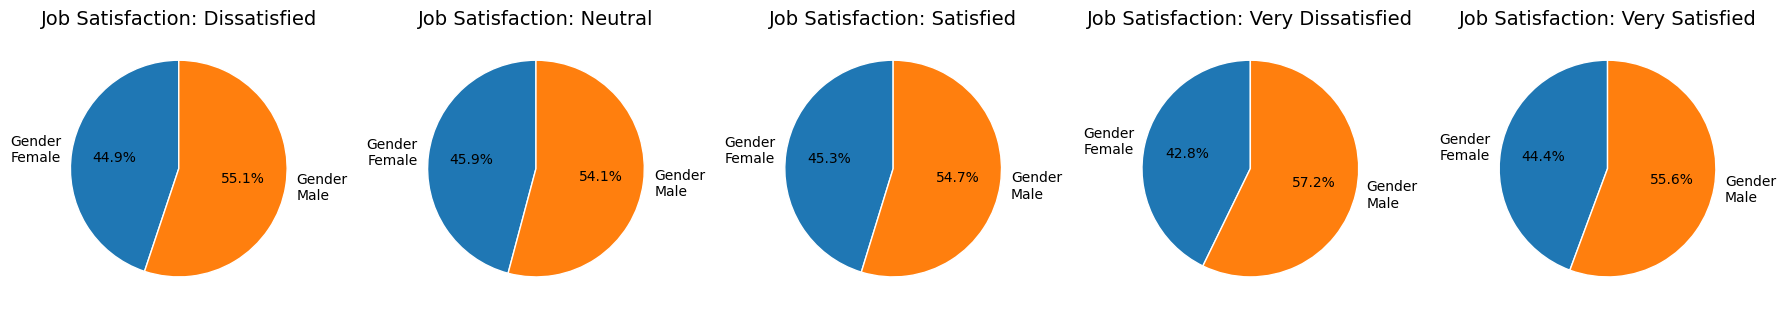

In [ ]:
#Grouping job satisfaction with gender
js_2 = df_employee.groupby(['job_satisfaction_label', 'gender']).agg({'emp_id': 'count'}).reset_index()

# Create a figure with 5 subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 10))

for i, category in enumerate(p_categories):

  p_viz = js_2[js_2['job_satisfaction_label'] == category]

  axes[i].pie(p_viz['emp_id'],
              labels= 'Gender\n' + p_viz['gender'],
              autopct='%1.1f%%',
              startangle=90,
              wedgeprops={'edgecolor': 'white'}
              )

  axes[i].set_title(f'Job Satisfaction: {category}', fontsize=14)


# Adjust layout
plt.tight_layout()
plt.show()

### 7. Job Satisfaction vs Departement

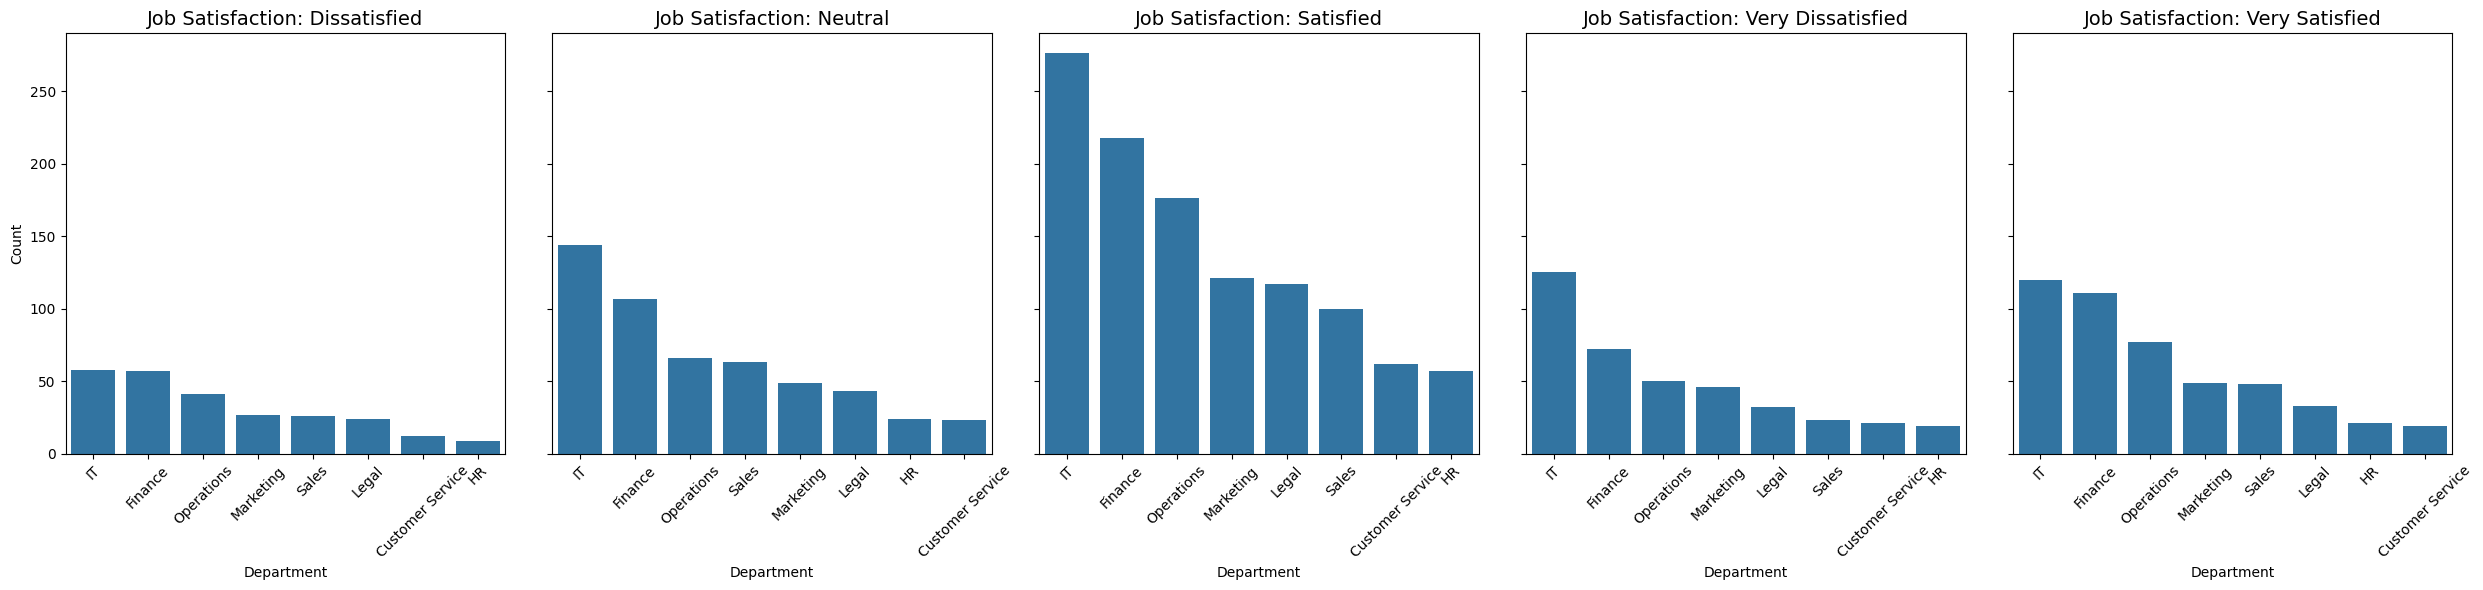

In [ ]:
# Get unique job satisfaction category
p_categories = df_employee['job_satisfaction_label'].unique()
p_categories.sort()  # urutkan jika perlu

# Prepare subplot
fig, axes = plt.subplots(1, len(p_categories), figsize=(5*len(p_categories), 6), sharey=True)

# Loop each job satisfaction category
for i, category in enumerate(p_categories):
    subset = df_employee[df_employee['job_satisfaction_label'] == category]

    sns.countplot(
        data=subset,
        x='dept',
        ax=axes[i],
        order=subset['dept'].value_counts().index
    )

    axes[i].set_title(f'Job Satisfaction: {category}', fontsize=14)
    axes[i].set_xlabel('Department')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 8. Job Satisfaction vs Workload

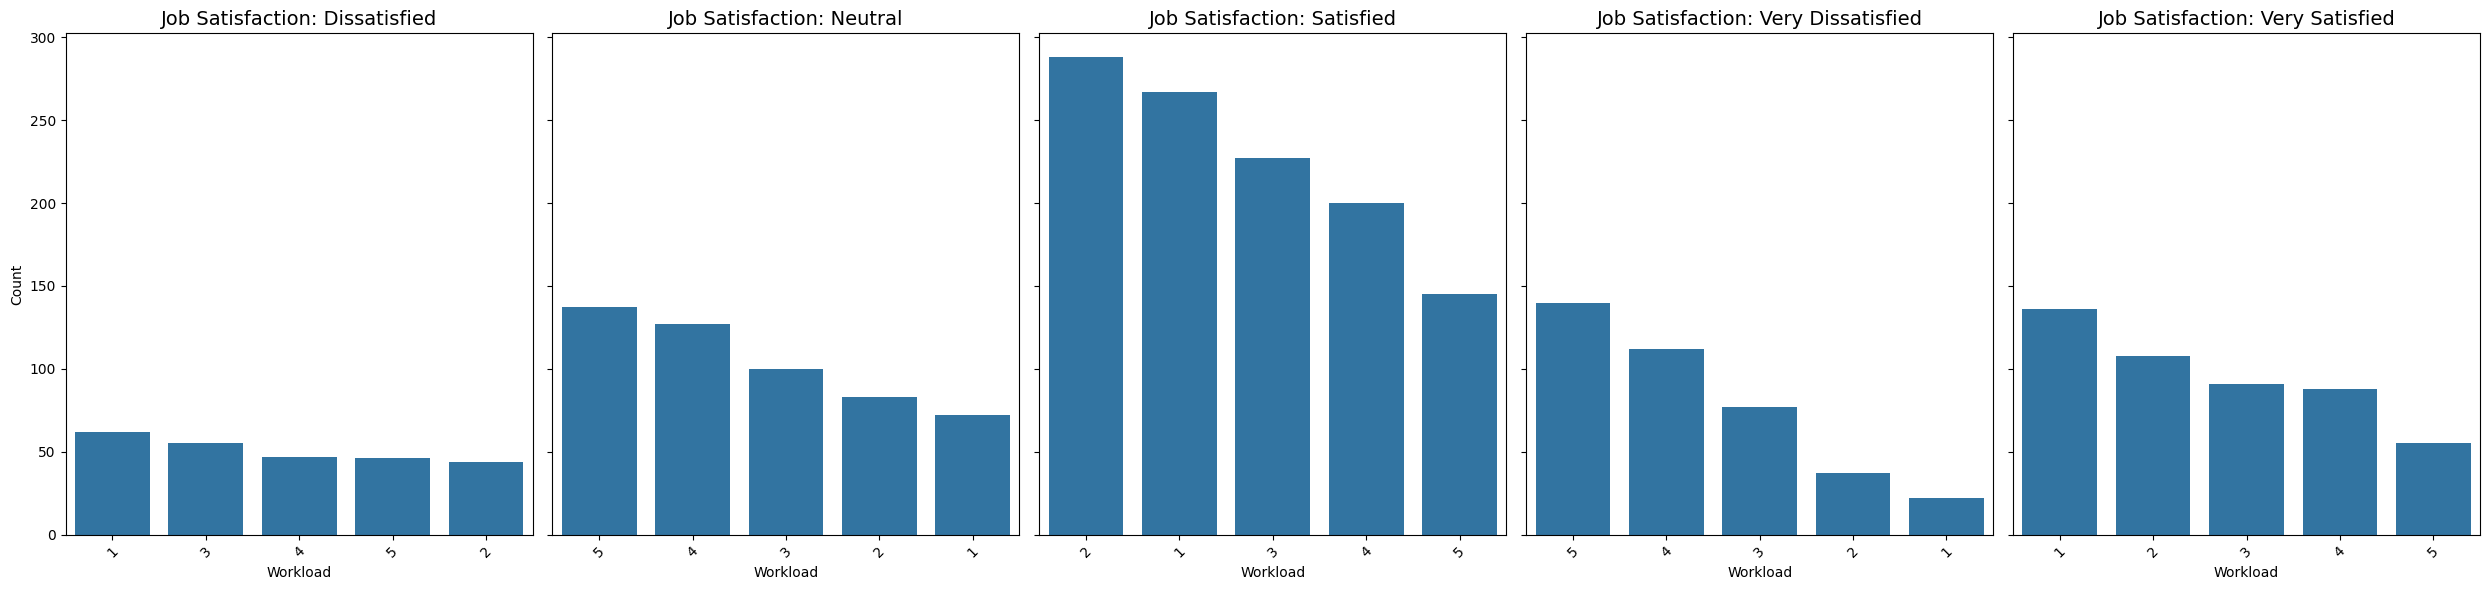

In [ ]:
# Get unique job satisfaction category and sort
p_categories = sorted(df_employee['job_satisfaction_label'].unique())

# Prepare subplot
fig, axes = plt.subplots(1, len(p_categories), figsize=(5*len(p_categories), 6), sharey=True)

if len(p_categories) == 1:
    axes = [axes]

# Loop each job satisfaction category
for i, category in enumerate(p_categories):
    subset = df_employee[df_employee['job_satisfaction_label'] == category]

    sns.countplot(
        data=subset,
        x='workload',
        ax=axes[i],
        order=subset['workload'].value_counts().index
    )

    axes[i].set_title(f'Job Satisfaction: {category}', fontsize=14)
    axes[i].set_xlabel('Workload')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 9. Job Satisfaction vs Team Size

In [ ]:
df_employee['team_size'].value_counts()

,count
team_size,
15,216
10,203
21,150
22,146
20,141
23,136
25,131
13,130
24,119


In [ ]:
# count the number of employee of each age and job_satisfaction category
js_5 = df_employee.groupby(['job_satisfaction_label', 'team_size']).agg({'emp_id': 'count'}).reset_index()

# unique categories of job_satisfaction
p_categories = js_5['job_satisfaction_label'].unique()

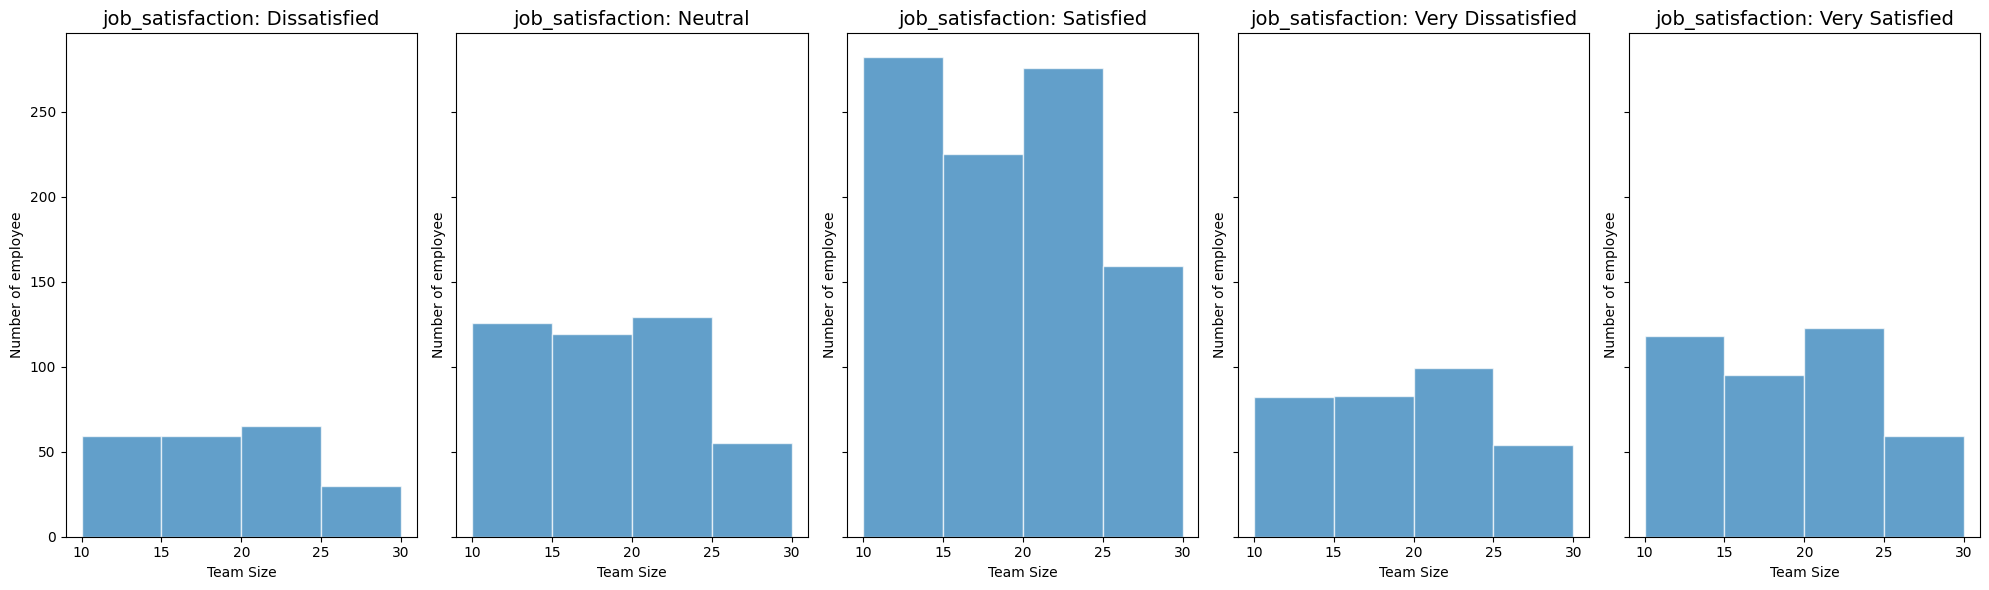

In [ ]:
# Create a range of number with interval of 5
bins = range(10, 35, 5) # Adjusted bin range for team_size

fig, axes = plt.subplots(1, len(p_categories), figsize=(20, 6), sharey=True)

# Ensure axes is an array even if there's only one category
if len(p_categories) == 1:
    axes = [axes]

for i, category in enumerate(p_categories):

    # Create the histogram
    axes[i].hist(df_employee[ df_employee['job_satisfaction_label'] == category ]['team_size'],
                 bins=bins,
                 edgecolor='white',
                 alpha=0.7
                 )

    axes[i].set_title(f'job_satisfaction: {category}', fontsize=14)
    axes[i].set_xlabel('Team Size', fontsize=10)
    axes[i].set_ylabel('Number of employee', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## CORRELATION MATRIX

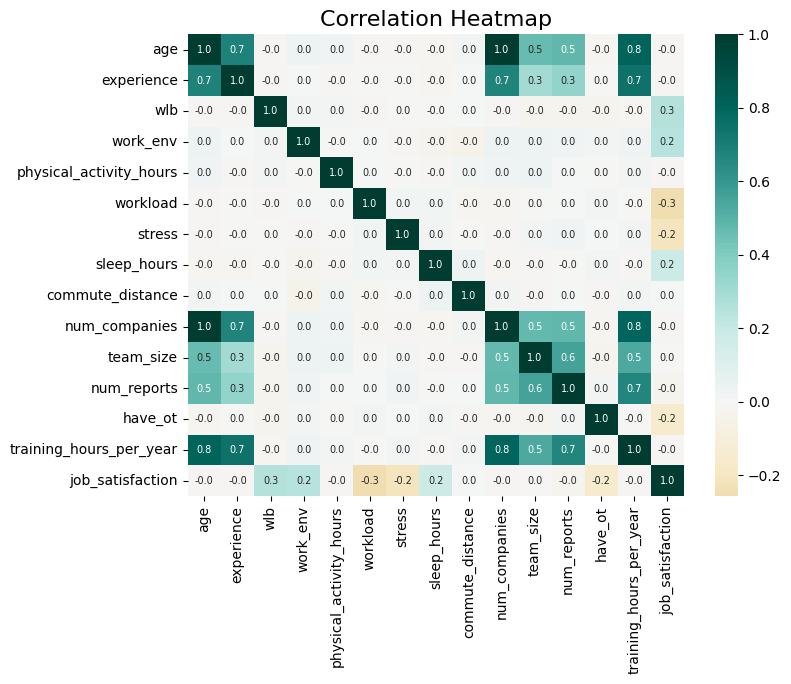

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_employee.select_dtypes(exclude='object').corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            cmap='BrBG',
            center=0,
            fmt=".1f",
            annot=True,
            annot_kws={"fontsize": 7},
            )

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#**The interpretation of each chart and recommendations are in the Power Point**